<a href="https://colab.research.google.com/github/armandordorica/Portfolio_Optimization/blob/master/Stocks_and_etfs_rotational_momentum_ranking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance

In [3]:
pwd

'/content'

In [4]:
start_dt= '2019-08-20'
end_dt = '2020-08-20'

In [5]:
from datetime import datetime, timedelta
from pandas_datareader import data as pdr

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


class Stock: 
  def __init__(self, stock_name, start_dt, end_dt):
    yf.pdr_override() # <== that's all it takes :-)

    self.stock_name = stock_name 
    self.start_dt = start_dt
    self.end_dt = end_dt 
    print("Name:{}, start_dt:{}, end_dt:{}".format(self.stock_name, self.start_dt, self.end_dt))
    self.data = pdr.get_data_yahoo(self.stock_name, start=self.start_dt, end=self.end_dt)

    self.ticker = yf.Ticker(self.stock_name)

    try: 
      self.beta = self.ticker.info['beta']
    except: 
      self.beta = 'N/A'

    self.timeseries = self.data['Close']
    self.dates = self.timeseries.index.to_frame()
    # self.one_year_return = self.get_annual_return(1)
    # self.two_year_return = self.get_annual_return(2)
    # self.five_year_return = self.get_annual_return(5)

  def get_annual_return(self, num_years):
    period = 365 *num_years
    print("Period:{}".format(period))
    try: 
      end = max(self.timeseries.index)
      print("end:{}".format(end))
      start = end - timedelta(days=period)
    
    except: 
      pass 
      
    try: 
      start = self.dates[self.dates['Date']<=start].iloc[-1].Date
      print("start:{}".format(start))

      ending_balance = self.timeseries.loc[end]
      beginning_balance = self.timeseries.loc[start]  

      return ((ending_balance - beginning_balance)/beginning_balance)/(period//365)

    except:
      print("\n Start date:{} is not available!".format(start))

  def get_monthly_return(self, num_months):
    period = 30 *num_months
    print("Period:{}".format(period))
    end = max(self.timeseries.index)
    print("end:{}".format(end))
  
    start = end - timedelta(days=period)
    try: 
      start = self.dates[self.dates['Date']<=start].iloc[-1].Date
      print("start:{}".format(start))

      ending_balance = self.timeseries.loc[end]
      beginning_balance = self.timeseries.loc[start]  

      return ((ending_balance - beginning_balance)/beginning_balance)/(period//30)

    except:
      print("\n Start date:{} is not available!".format(start))

  
  def get_monthly_std(self, num_months): 
    period = 30*num_months
    print("Period:{}".format(period))
    end = max(self.timeseries.index)
    print("end:{}".format(end))
  
    start = end - timedelta(days=period)
    try: 

      std_dev = self.data.loc[start:end]['Close'].std()

      print("start:{}".format(start))

      return std_dev

    except:
      print("\n Start date:{} is not available!".format(start))

  
  
  def plot(self):
    self.timeseries.plot()
    plt.title(self.stock_name)

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


### **Input your list of Stocks or ETFs here**

In [6]:
sector_etfs = ['IGV', 
               'IYJ',
               'SMH', 
               'PBS', 
               'KBE', 
               'XEG.TO', 
               'ZEO.TO', 
               'RYE', 
               'FILL', 
               'XRT', 
               'VCR',
               'XUU.TO', 
               'ZCN.TO', 
               'HXT.TO', 
               'VCN.TO',
               'ZSP.TO', 
               'VFV.TO', 
               'VUN.TO', 
               'XUU.TO', 
               'VSP.TO',
               'IYW', 'KIE', 'ITA', 'IHI', 'ITB', 'IYT', 'XLB', 'IYZ', 'KCE', 'XLP', 'VNQ', 'IHE', 'PBJ', 'IBB', 'IEZ', 'XLU', 'XOP', 
               'XRT',
               'IHF']

In [7]:
import time 
three_mth_returns = []
three_mth_stddevs = []

for etf in sector_etfs: 
  etf_yahoo = None
  while etf_yahoo is None:
    try:
        # connect
        print(etf)
        time.sleep(1)
        etf_yahoo = Stock(etf, start_dt, end_dt)
        three_mth_returns.append(etf_yahoo.get_monthly_return(3))
        three_mth_stddevs.append(etf_yahoo.get_monthly_std(3))
    except:
      three_mth_returns.append(0)
      three_mth_stddevs.append(1000)
      pass

IGV
Name:IGV, start_dt:2019-08-20, end_dt:2020-08-20
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-08-19 00:00:00
start:2020-05-21 00:00:00
Period:90
end:2020-08-19 00:00:00
start:2020-05-21 00:00:00
IYJ
Name:IYJ, start_dt:2019-08-20, end_dt:2020-08-20
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-08-19 00:00:00
start:2020-05-21 00:00:00
Period:90
end:2020-08-19 00:00:00
start:2020-05-21 00:00:00
SMH
Name:SMH, start_dt:2019-08-20, end_dt:2020-08-20
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-08-19 00:00:00
start:2020-05-21 00:00:00
Period:90
end:2020-08-19 00:00:00
start:2020-05-21 00:00:00
PBS
Name:PBS, start_dt:2019-08-20, end_dt:2020-08-20
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-08-19 00:00:00
start:2020-05-21 00:00:00
Period:90
end:2020-08-19 00:00:00
start:2020-05-21 00:00:00
KBE
Name:KBE, start_dt:2019-08-2

In [8]:

one_mth_returns = []
one_mth_stddevs = []

for etf in sector_etfs: 
  etf_yahoo = None
  while etf_yahoo is None:
    try:
        # connect
        print(etf)
        time.sleep(1)
        etf_yahoo = Stock(etf, start_dt, end_dt)
        one_mth_returns.append(etf_yahoo.get_monthly_return(1))
        one_mth_stddevs.append(etf_yahoo.get_monthly_std(1))
    except:
      one_mth_returns.append(0)
      one_mth_stddevs.append(1000)
      pass


IGV
Name:IGV, start_dt:2019-08-20, end_dt:2020-08-20
[*********************100%***********************]  1 of 1 completed
Period:30
end:2020-08-19 00:00:00
start:2020-07-20 00:00:00
Period:30
end:2020-08-19 00:00:00
start:2020-07-20 00:00:00
IYJ
Name:IYJ, start_dt:2019-08-20, end_dt:2020-08-20
[*********************100%***********************]  1 of 1 completed
Period:30
end:2020-08-19 00:00:00
start:2020-07-20 00:00:00
Period:30
end:2020-08-19 00:00:00
start:2020-07-20 00:00:00
SMH
Name:SMH, start_dt:2019-08-20, end_dt:2020-08-20
[*********************100%***********************]  1 of 1 completed
Period:30
end:2020-08-19 00:00:00
start:2020-07-20 00:00:00
Period:30
end:2020-08-19 00:00:00
start:2020-07-20 00:00:00
PBS
Name:PBS, start_dt:2019-08-20, end_dt:2020-08-20
[*********************100%***********************]  1 of 1 completed
Period:30
end:2020-08-19 00:00:00
start:2020-07-20 00:00:00
Period:30
end:2020-08-19 00:00:00
start:2020-07-20 00:00:00
KBE
Name:KBE, start_dt:2019-08-2

In [9]:

d = {'sector_etfs': sector_etfs, 'three_mth_returns': three_mth_returns, 'three_mth_stddevs':three_mth_stddevs, 'one_mth_returns':one_mth_returns, 'one_mth_stddevs':one_mth_stddevs}
etfs_df = pd.DataFrame(data=d)
etfs_df

,sector_etfs,three_mth_returns,three_mth_stddevs,one_mth_returns,one_mth_stddevs
0,IGV,0.052639,12.681915,0.005556,5.019886
1,IYJ,0.062064,7.006745,0.063156,4.279671
2,SMH,0.080731,10.262724,0.046754,4.142100
3,PBS,0.064864,1.618025,0.041012,0.774202
4,KBE,0.031464,1.839324,0.073105,1.026833
5,XEG.TO,0.012227,0.293090,0.109504,0.219148
6,ZEO.TO,0.015319,1.299470,0.087284,0.984703
7,RYE,-0.000118,1.836100,0.049314,0.706962
8,FILL,0.001354,0.539416,0.017284,0.234635
9,XRT,0.114130,3.599905,0.164259,2.373313


In [10]:
etfs_df['three_mth_return_score']=etfs_df['three_mth_returns'].rank().astype(int)
etfs_df['one_mth_return_score']=etfs_df['one_mth_returns'].rank().astype(int)

In [11]:
etfs_df['three_mth_volatility_score']=etfs_df['three_mth_stddevs'].rank(ascending=False).astype(int)
etfs_df['one_mth_volatility_score']=etfs_df['one_mth_stddevs'].rank(ascending=False).astype(int)

In [12]:
etfs_df['global_score'] = etfs_df['three_mth_return_score'] + etfs_df['three_mth_volatility_score'] +etfs_df['one_mth_return_score'] + etfs_df['one_mth_volatility_score']
etfs_df

,sector_etfs,three_mth_returns,three_mth_stddevs,one_mth_returns,one_mth_stddevs,three_mth_return_score,one_mth_return_score,three_mth_volatility_score,one_mth_volatility_score,global_score
0,IGV,0.052639,12.681915,0.005556,5.019886,28,2,4,4,38
1,IYJ,0.062064,7.006745,0.063156,4.279671,31,29,8,6,74
2,SMH,0.080731,10.262724,0.046754,4.142100,34,25,6,7,72
3,PBS,0.064864,1.618025,0.041012,0.774202,32,22,25,25,104
4,KBE,0.031464,1.839324,0.073105,1.026833,17,30,22,19,88
5,XEG.TO,0.012227,0.293090,0.109504,0.219148,5,34,39,39,117
6,ZEO.TO,0.015319,1.299470,0.087284,0.984703,6,33,27,21,87
7,RYE,-0.000118,1.836100,0.049314,0.706962,1,26,23,26,76
8,FILL,0.001354,0.539416,0.017284,0.234635,2,9,38,38,87
9,XRT,0.114130,3.599905,0.164259,2.373313,37,38,14,12,101


In [13]:
etfs_df.sort_values(by='global_score', ascending=False)

,sector_etfs,three_mth_returns,three_mth_stddevs,one_mth_returns,one_mth_stddevs,three_mth_return_score,one_mth_return_score,three_mth_volatility_score,one_mth_volatility_score,global_score
34,IEZ,0.060016,0.753179,0.123986,0.416303,30,36,35,35,136
5,XEG.TO,0.012227,0.293090,0.109504,0.219148,5,34,39,39,117
32,PBJ,0.039921,1.202630,0.054871,0.500961,23,28,29,30,110
12,ZCN.TO,0.037608,0.653859,0.027064,0.301523,20,14,37,37,108
3,PBS,0.064864,1.618025,0.041012,0.774202,32,22,25,25,104
21,KIE,0.039477,1.193028,0.037809,0.620219,22,21,30,28,101
24,ITB,0.116439,4.256524,0.154070,2.168105,39,37,11,14,101
37,XRT,0.114130,3.599905,0.164259,2.373313,37,38,14,12,101
9,XRT,0.114130,3.599905,0.164259,2.373313,37,38,14,12,101
14,VCN.TO,0.036165,0.971013,0.027368,0.461721,19,15,32,34,100


Text(0.5, 1.0, 'Sector ETFS distribution of risk and variance')

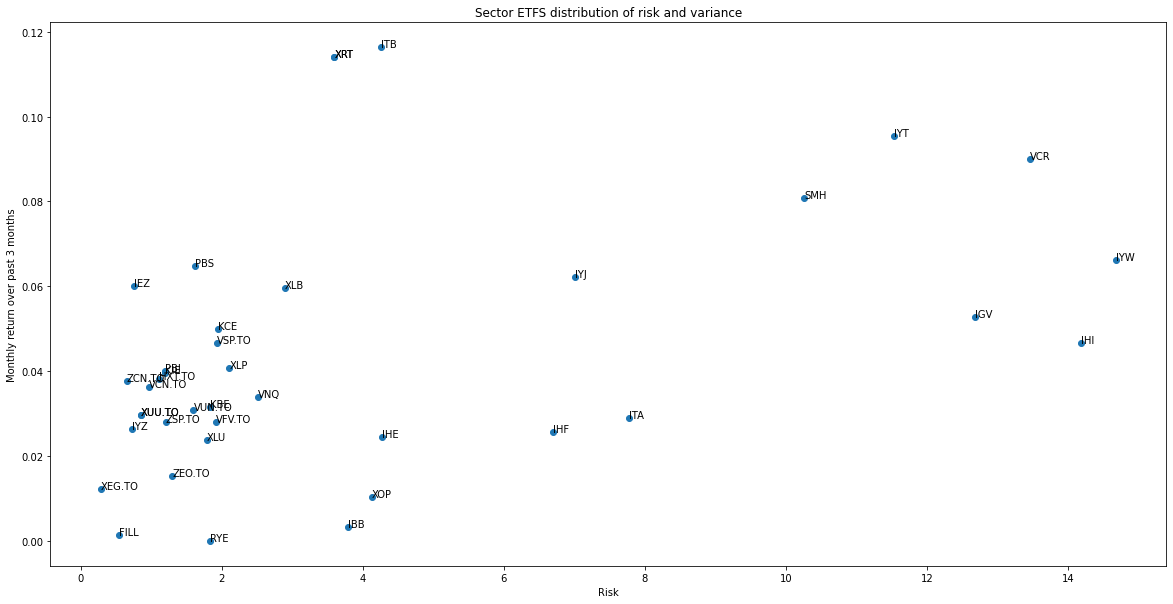

In [14]:
x = etfs_df['three_mth_stddevs']
y = etfs_df['three_mth_returns']
n = etfs_df['sector_etfs']

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

ax.set_ylabel('Monthly return over past 3 months')
ax.set_xlabel('Risk')
ax.set_title("Sector ETFS distribution of risk and variance")


### IGV - iShares S&P Software Industry Index

In [15]:
IGV = Stock ('IGV', start_dt, end_dt)

Name:IGV, start_dt:2019-08-20, end_dt:2020-08-20
[*********************100%***********************]  1 of 1 completed


In [16]:
IGV.get_monthly_std(3)

Period:90
end:2020-08-19 00:00:00
start:2020-05-21 00:00:00


12.681914977143759

In [17]:
three_mth_return = IGV.get_monthly_return(3)
three_mth_return

Period:90
end:2020-08-19 00:00:00
start:2020-05-21 00:00:00


0.05263903322513588

In [18]:
three_mth_return

0.05263903322513588

### Stocks Risk Return Analysis

In [19]:
stocks =['AAPL',
         'ADBE', 
 'AC',
 'AMD',
 'AMZN',
 'AXP',
 'BABA',
 'COST',
 'DAL',
 'DIA',
 'FB',
 'GOOGL',
 'HD',
 'INTC',
 'INTU',
 'IVR',
 'L',
 'LULU',
 'LMT',
 'MA',
 'MELI',
 'MRNA',
 'MSFT',
 'NFLX',
 'NVDA',
 'PYPL',
 #'QQQ',
 'QTEC',
 'RY',
 'SHOP',
 'SNE',
 'SPCE',
 'SPY',
 'SQ',
 'UBER',
 'V',
 'ZM']

In [20]:
Stock('DIA', start_dt, end_dt)

Name:DIA, start_dt:2019-08-20, end_dt:2020-08-20
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- DIA: No data found, symbol may be delisted


In [21]:

one_mth_returns = []
one_mth_stddevs = []

for stock in stocks: 
  etf_yahoo = None
  while etf_yahoo is None:
    try:
        # connect
        print(stock)
        time.sleep(1)
        etf_yahoo = Stock(stock, start_dt, end_dt)
        one_mth_returns.append(etf_yahoo.get_monthly_return(1))
        one_mth_stddevs.append(etf_yahoo.get_monthly_std(1))
    except:
      one_mth_returns.append(0)
      one_mth_stddevs.append(1000)
      pass


AAPL
Name:AAPL, start_dt:2019-08-20, end_dt:2020-08-20
[*********************100%***********************]  1 of 1 completed
Period:30
end:2020-08-19 00:00:00
start:2020-07-20 00:00:00
Period:30
end:2020-08-19 00:00:00
start:2020-07-20 00:00:00
ADBE
Name:ADBE, start_dt:2019-08-20, end_dt:2020-08-20
[*********************100%***********************]  1 of 1 completed
Period:30
end:2020-08-19 00:00:00
start:2020-07-20 00:00:00
Period:30
end:2020-08-19 00:00:00
start:2020-07-20 00:00:00
AC
Name:AC, start_dt:2019-08-20, end_dt:2020-08-20
[*********************100%***********************]  1 of 1 completed
Period:30
end:2020-08-19 00:00:00
start:2020-07-20 00:00:00
Period:30
end:2020-08-19 00:00:00
start:2020-07-20 00:00:00
AMD
Name:AMD, start_dt:2019-08-20, end_dt:2020-08-20
[*********************100%***********************]  1 of 1 completed
Period:30
end:2020-08-19 00:00:00
start:2020-07-20 00:00:00
Period:30
end:2020-08-19 00:00:00
start:2020-07-20 00:00:00
AMZN
Name:AMZN, start_dt:2019-

In [22]:

three_mth_returns = []
three_mth_stddevs = []

for stock in stocks: 
  etf_yahoo = None
  while etf_yahoo is None:
    try:
      # connect
      print(stock)
      time.sleep(3)
      etf_yahoo = Stock(stock, start_dt, end_dt)
      three_mth_returns.append(etf_yahoo.get_monthly_return(3))
      three_mth_stddevs.append(etf_yahoo.get_monthly_std(3))
    except:
      three_mth_returns.append(0)
      three_mth_stddevs.append(1000)
      pass


AAPL
Name:AAPL, start_dt:2019-08-20, end_dt:2020-08-20
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-08-19 00:00:00
start:2020-05-21 00:00:00
Period:90
end:2020-08-19 00:00:00
start:2020-05-21 00:00:00
ADBE
Name:ADBE, start_dt:2019-08-20, end_dt:2020-08-20
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-08-19 00:00:00
start:2020-05-21 00:00:00
Period:90
end:2020-08-19 00:00:00
start:2020-05-21 00:00:00
AC
Name:AC, start_dt:2019-08-20, end_dt:2020-08-20
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-08-19 00:00:00
start:2020-05-21 00:00:00
Period:90
end:2020-08-19 00:00:00
start:2020-05-21 00:00:00
AMD
Name:AMD, start_dt:2019-08-20, end_dt:2020-08-20
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-08-19 00:00:00
start:2020-05-21 00:00:00
Period:90
end:2020-08-19 00:00:00
start:2020-05-21 00:00:00
AMZN
Name:AMZN, start_dt:2019-

In [23]:

twelve_mth_returns = []
twelve_mth_stddevs = []

for stock in stocks: 
  etf_yahoo = None
  while etf_yahoo is None:
    try:
      # connect
      print(stock)
      time.sleep(3)
      etf_yahoo = Stock(stock, '2019-07-01', end_dt)
      twelve_mth_returns.append(etf_yahoo.get_monthly_return(12))
      twelve_mth_stddevs.append(etf_yahoo.get_monthly_std(12))
    except:
      twelve_mth_returns.append(0)
      twelve_mth_stddevs.append(1000)
      pass

AAPL
Name:AAPL, start_dt:2019-07-01, end_dt:2020-08-20
[*********************100%***********************]  1 of 1 completed
Period:360
end:2020-08-19 00:00:00
start:2019-08-23 00:00:00
Period:360
end:2020-08-19 00:00:00
start:2019-08-25 00:00:00
ADBE
Name:ADBE, start_dt:2019-07-01, end_dt:2020-08-20
[*********************100%***********************]  1 of 1 completed
Period:360
end:2020-08-19 00:00:00
start:2019-08-23 00:00:00
Period:360
end:2020-08-19 00:00:00
start:2019-08-25 00:00:00
AC
Name:AC, start_dt:2019-07-01, end_dt:2020-08-20
[*********************100%***********************]  1 of 1 completed
Period:360
end:2020-08-19 00:00:00
start:2019-08-23 00:00:00
Period:360
end:2020-08-19 00:00:00
start:2019-08-25 00:00:00
AMD
Name:AMD, start_dt:2019-07-01, end_dt:2020-08-20
[*********************100%***********************]  1 of 1 completed
Period:360
end:2020-08-19 00:00:00
start:2019-08-23 00:00:00
Period:360
end:2020-08-19 00:00:00
start:2019-08-25 00:00:00
AMZN
Name:AMZN, start_

In [24]:
len(twelve_mth_stddevs), len(twelve_mth_returns)

(36, 36)

In [25]:
d = {'stocks': stocks, 
     'twelve_mth_returns': twelve_mth_returns, 
     'twelve_mth stddevs':twelve_mth_stddevs,
     'three_mth_returns' :three_mth_returns, 'three_mth_stddevs': three_mth_stddevs, 
     'one_mth_returns' :one_mth_returns, 'one_mth_stddevs': one_mth_stddevs}
stocks_df = pd.DataFrame(data=d)
stocks_df

,stocks,twelve_mth_returns,twelve_mth stddevs,three_mth_returns,three_mth_stddevs,one_mth_returns,one_mth_stddevs
0,AAPL,0.107000,60.024874,0.153574,44.487566,0.176397,35.378588
1,ADBE,0.052982,57.451614,0.069637,25.783610,0.014804,9.647755
2,AC,0.008653,4.181548,-0.009620,2.282836,-0.003684,1.150529
3,AMD,0.145424,12.875599,0.161269,12.149354,0.411243,9.426299
4,AMZN,0.071961,471.309319,0.110860,284.950985,0.019907,83.726275
5,AXP,-0.014769,16.486226,0.026198,4.979995,0.030745,2.866961
6,BABA,0.048646,25.228235,0.076090,19.976554,0.022684,5.095780
7,COST,0.020343,13.215374,0.042973,14.715451,0.044072,6.567734
8,DAL,-0.042304,15.369047,0.064911,2.546942,0.055301,1.455468
9,DIA,0.000000,1000.000000,0.000000,1000.000000,0.000000,1000.000000


In [26]:
stocks_df['three_mth_return_score']=stocks_df['three_mth_returns'].rank().astype(int)
stocks_df['one_mth_return_score']=stocks_df['one_mth_returns'].rank().astype(int)
stocks_df['twelve_mth_return_score']=stocks_df['twelve_mth_returns'].rank().astype(int)

stocks_df['three_mth_volatility_score']=stocks_df['three_mth_stddevs'].rank(ascending=False).astype(int)
stocks_df['one_mth_volatility_score']=stocks_df['one_mth_stddevs'].rank(ascending=False).astype(int)
stocks_df['twelve_mth_volatility_score']=stocks_df['twelve_mth stddevs'].rank(ascending=False).astype(int)

stocks_df['global_score'] = stocks_df['three_mth_return_score'] + stocks_df['three_mth_volatility_score'] +\
                            stocks_df['one_mth_return_score'] + stocks_df['one_mth_volatility_score'] +\
                            stocks_df['twelve_mth_return_score'] + stocks_df['twelve_mth_volatility_score']

stocks_df['global_score2'] = stocks_df['three_mth_return_score'] + stocks_df['three_mth_volatility_score'] +\
                            stocks_df['one_mth_return_score'] + stocks_df['one_mth_volatility_score']                           

stocks_df.sort_values(by='global_score', ascending=False)

,stocks,twelve_mth_returns,twelve_mth stddevs,three_mth_returns,three_mth_stddevs,one_mth_returns,one_mth_stddevs,three_mth_return_score,one_mth_return_score,twelve_mth_return_score,three_mth_volatility_score,one_mth_volatility_score,twelve_mth_volatility_score,global_score,global_score2
3,AMD,0.145424,12.875599,0.161269,12.149354,0.411243,9.426299,33,36,35,21,20,29,174,110
29,SNE,0.042193,6.842176,0.097545,6.007524,0.037350,2.263306,30,24,25,27,31,32,169,112
27,RY,0.000522,8.308157,0.077470,2.866806,0.054193,1.817107,28,28,15,32,32,31,166,120
32,SQ,0.119497,25.385646,0.281752,22.300947,0.171197,10.322063,36,33,33,17,17,19,155,103
8,DAL,-0.042304,15.369047,0.064911,2.546942,0.055301,1.455468,25,29,1,33,33,26,147,120
30,SPCE,0.057402,5.596370,0.063902,3.146496,-0.237163,2.862495,24,1,29,30,29,33,146,84
16,L,-0.019457,8.318352,0.042796,1.892660,0.021727,0.909658,18,21,2,36,36,30,143,111
0,AAPL,0.107000,60.024874,0.153574,44.487566,0.176397,35.378588,32,34,32,14,14,15,141,94
31,SPY,0.015324,22.649061,0.047873,11.753967,0.039806,6.099070,23,26,21,23,24,23,140,96
7,COST,0.020343,13.215374,0.042973,14.715451,0.044072,6.567734,19,27,23,20,23,28,140,89


Text(0.5, 1.0, 'Distribution of stocks by risk and variance')

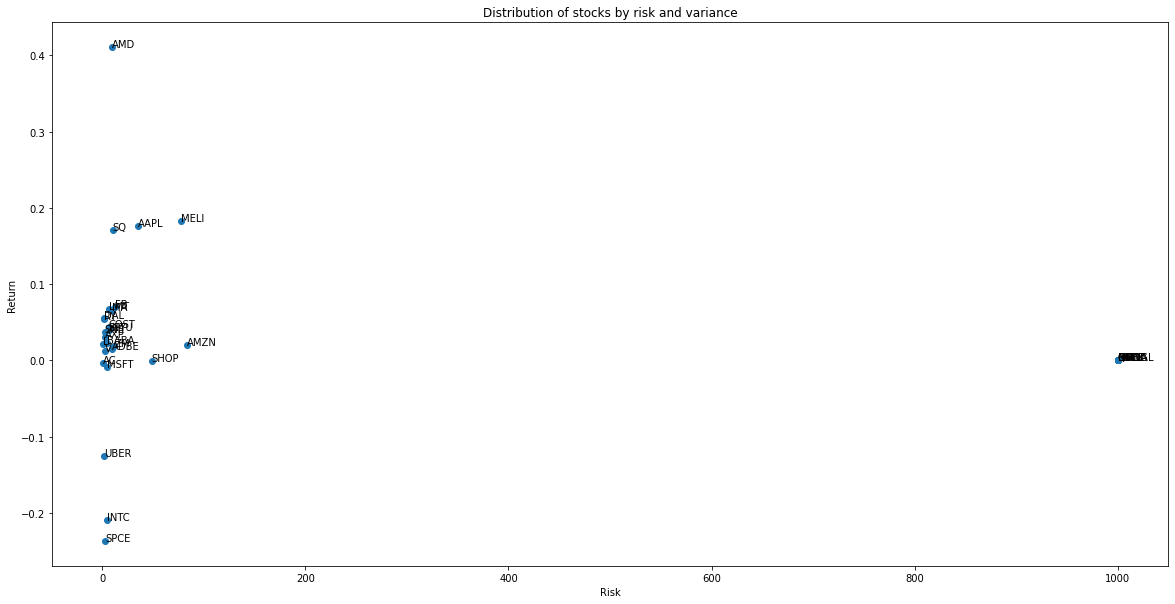

In [27]:
x = stocks_df['one_mth_stddevs']
y = stocks_df['one_mth_returns']
n = stocks_df['stocks']

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

ax.set_ylabel('Return')
ax.set_xlabel('Risk')
ax.set_title("Distribution of stocks by risk and variance")

Text(0.5, 1.0, 'Distribution of stocks by risk and variance')

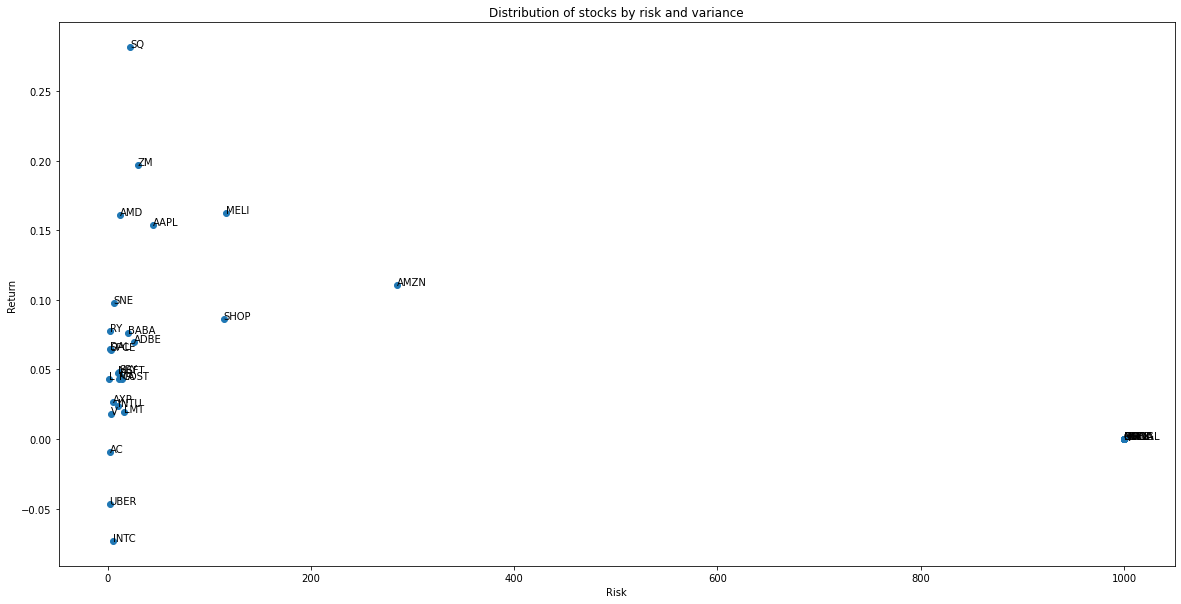

In [28]:
x = stocks_df['three_mth_stddevs']
y = stocks_df['three_mth_returns']
n = stocks_df['stocks']

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

ax.set_ylabel('Return')
ax.set_xlabel('Risk')
ax.set_title("Distribution of stocks by risk and variance")

### One year returns

In [29]:
one_year_returns = []
for stock in stocks: 
  print(stock)
  stock_yahoo = Stock(stock, '2019-07-01', end_dt)
  one_year_returns.append(stock_yahoo.get_monthly_return(12))

AAPL
Name:AAPL, start_dt:2019-07-01, end_dt:2020-08-20
[*********************100%***********************]  1 of 1 completed
Period:360
end:2020-08-19 00:00:00
start:2019-08-23 00:00:00
ADBE
Name:ADBE, start_dt:2019-07-01, end_dt:2020-08-20
[*********************100%***********************]  1 of 1 completed
Period:360
end:2020-08-19 00:00:00
start:2019-08-23 00:00:00
AC
Name:AC, start_dt:2019-07-01, end_dt:2020-08-20
[*********************100%***********************]  1 of 1 completed
Period:360
end:2020-08-19 00:00:00
start:2019-08-23 00:00:00
AMD
Name:AMD, start_dt:2019-07-01, end_dt:2020-08-20
[*********************100%***********************]  1 of 1 completed
Period:360
end:2020-08-19 00:00:00
start:2019-08-23 00:00:00
AMZN
Name:AMZN, start_dt:2019-07-01, end_dt:2020-08-20
[*********************100%***********************]  1 of 1 completed
Period:360
end:2020-08-19 00:00:00
start:2019-08-23 00:00:00
AXP
Name:AXP, start_dt:2019-07-01, end_dt:2020-08-20
[*********************100%**

ValueError: ignored

In [ ]:
one_year_stddevs = []
for stock in stocks: 
  print(stock)
  stock_yahoo = Stock(stock, '2019-07-01', end_dt)
  one_year_stddevs.append(stock_yahoo.get_monthly_std(12))

In [ ]:
d = {'stocks': stocks, 'One year returns': one_year_returns, 'One year stddevs':one_year_stddevs}
stocks_df = pd.DataFrame(data=d)
stocks_df

In [ ]:
x = stocks_df['One year stddevs']
y = stocks_df['One year returns']
n = stocks_df['stocks']

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

ax.set_ylabel('Return')
ax.set_xlabel('Risk')
ax.set_title("Distribution of stocks by risk and variance")


### Three-year returns 

In [ ]:
three_year_returns = []
for stock in stocks: 
  print(stock)
  stock_yahoo = Stock(stock, '2017-05-01', end_dt)
  three_year_returns.append(stock_yahoo.get_monthly_return(36))

three_year_stddevs = []
for stock in stocks: 
  print(stock)
  stock_yahoo = Stock(stock, '2017-05-01', end_dt)
  three_year_stddevs.append(stock_yahoo.get_monthly_std(36))

d = {'stocks': stocks, 'three_year_returns': three_year_returns, 'three_year_stddevs':three_year_stddevs}
stocks_3y_df = pd.DataFrame(data=d)
stocks_3y_df

x = stocks_3y_df['three_year_stddevs']
y = stocks_3y_df['three_year_returns']
n = stocks_3y_df['stocks']

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

ax.set_ylabel('Return')
ax.set_xlabel('Risk')
ax.set_title("Distribution of stocks by risk and variance")


AAPL
Name:AAPL, start_dt:2017-05-01, end_dt:2020-08-20
[*********************100%***********************]  1 of 1 completed
Period:1080
end:2020-08-19 00:00:00
start:2017-09-01 00:00:00
ADBE
Name:ADBE, start_dt:2017-05-01, end_dt:2020-08-20
[*********************100%***********************]  1 of 1 completed
Period:1080
end:2020-08-19 00:00:00
start:2017-09-01 00:00:00
AC
Name:AC, start_dt:2017-05-01, end_dt:2020-08-20
[*********************100%***********************]  1 of 1 completed
Period:1080
end:2020-08-19 00:00:00
start:2017-09-01 00:00:00
AMD
Name:AMD, start_dt:2017-05-01, end_dt:2020-08-20
[*********************100%***********************]  1 of 1 completed
Period:1080
end:2020-08-19 00:00:00
start:2017-09-01 00:00:00
AMZN
Name:AMZN, start_dt:2017-05-01, end_dt:2020-08-20
[*********************100%***********************]  1 of 1 completed
Period:1080
end:2020-08-19 00:00:00
start:2017-09-01 00:00:00
AXP
Name:AXP, start_dt:2017-05-01, end_dt:2020-08-20
[*********************1

### Market Vectors Semiconductor ETF

In [ ]:
AMZN = Stock ('AMZN', '2012-01-01', end_dt)

In [ ]:
AMZN.get_monthly_return(3)

In [ ]:
SMH = Stock ('SMH', '2012-01-01',  end_dt)